<a href="https://colab.research.google.com/github/joaochenriques/AERO1_2021_2022/blob/main/Joukowski_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from numpy import *
import matplotlib.pyplot as mpl
%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (5, 5)

In [28]:
i = 1J
𝜋 = pi
n = 100 # points per side
θ = linspace( 0, 2*𝜋, 2*n-1 )

In [29]:
def draw_grid():
  mpl.axis('equal')
  mpl.axhline(y= 0,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 0,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 1,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x=-1,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x=-2,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 2,lw=1,dashes=(5,2),color='0.5')

def deg2rad( a ):
  return a * 𝜋 / 180.0

## **Joukowsky airfoil** 

$\Delta r$ - displacement in the real axis

$\Delta i$ - displacement in the imag axis

$a$ - circle radius

$c$ - circle center

$\zeta$ - circle coordinates in the $(\xi,\eta)$ plane

$z$ - Joukowsky airfoil coordinates in the $(x,y)$ plane

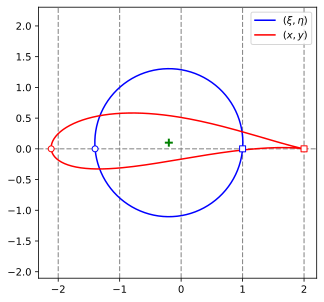

In [54]:
Δr = -0.2
Δi =  0.1

a = sqrt( (1.0-Δr)**2 + Δi**2 )
c = complex( Δr, Δi )
ζ = a * exp( i*θ ) + c
z = ζ + 1.0 / ζ

draw_grid()

mpl.plot( real(ζ), imag(ζ),'b', label=r'$(\xi,\eta)$')
mpl.plot( real(z), imag(z),'r', label=r'$(x,y)$')

# LE and TE points
ζe = array( ( complex(-1+2*Δr,0), complex(1,0) ) )
ze = ζe + 1.0 / ζe
mpl.plot( real(ζe[0]), imag(ζe[0]),'bo', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ze[0]), imag(ze[0]),'ro', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ζe[1]), imag(ζe[1]),'bs', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ze[1]), imag(ze[1]),'rs', fillstyle='none', markersize=6, markerfacecolor='w')
# circle center
mpl.plot( real(c), imag(c),'g+', markersize=8, markeredgewidth=2)

mpl.legend();

Airfoil = copy(z)

(-3.3333333333333335,
 3.2448275862069016,
 -2.8333333333333335,
 2.7334290637564673)

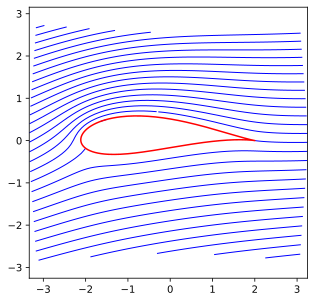

In [84]:
α = deg2rad( 10.0 )
β = arctan( Δi / (1.0-Δr) )

Γ = 4*𝜋*a*sin( α + β )

x = arange(-3.0, 3.0, 0.1 )
y = arange(-3.0, 3.0, 0.1 )
x,y = meshgrid(x,y)
z = x + y*i
z = ma.masked_where(absolute(z-c)<=a, z)
Z = z-c

# log does has a bug with masked arrays
# evaluate each entry
ll = zeros( Z.shape, dtype=complex )
with errstate(divide='ignore'):
  for k, zz in ndenumerate(Z):
      ll[k] = log( zz / a )

WZ = exp( -i*α ) * Z + exp( i*α ) * a**2 / Z + Γ*i / (2*𝜋) * ll
J = z + 1.0 / z 

levels = arange(-5.8, 5.8, 0.2).tolist()

mpl.figure()
mpl.contour( J.real, J.imag, WZ.imag, levels=levels, colors='blue', linewidths=1, linestyles='solid')

mpl.plot(Airfoil.real, Airfoil.imag, 'r-')
mpl.axis('equal')

In [19]:
i

1j